Example adapted from:
    
https://residentmario.github.io/geoplot/gallery/plot_obesity.html

In [1]:
%matplotlib inline


# Cartogram of US states by obesity rate

This example ``cartogram`` showcases regional trends for obesity in the United States. Rugged
mountain states are the healthiest; the deep South, the unhealthiest.

This example inspired by the `"Non-Contiguous Cartogram" <https://bl.ocks.org/mbostock/4055908>`_
example in the D3.JS example gallery.


Text(0.5, 1.0, 'Adult Obesity Rate by State, 2013')

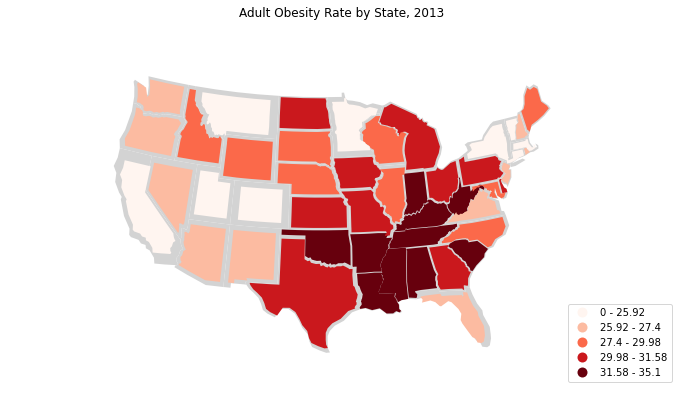

In [2]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

# load the data
obesity_by_state = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa['Obesity Rate'] = contiguous_usa['state'].map(
    lambda state: obesity_by_state.query("State == @state").iloc[0]['Percent']
)
scheme = mc.Quantiles(contiguous_usa['Obesity Rate'], k=5)


ax = gplt.cartogram(
    contiguous_usa,
    scale='Obesity Rate', limits=(0.75, 1),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    hue='Obesity Rate', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(12, 7)
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='None', ax=ax)

plt.title("Adult Obesity Rate by State, 2013")